<a href="https://colab.research.google.com/github/ParitoshVyawahare/Academic_FDA/blob/main/ParitoshVyawahare_project2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project2-Bar Crawl: Detecting Heavy Drinking**

Word as a company wants to create a smartphone app that uses accelerometer data to identify cases of excessive drinking. The main goal is to develop an accessible and trustworthy technology that can precisely detect patterns related to




In [ ]:
# Importing all the neccasary lib for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#connecting drive to colab as all my cvs file is in my drive folder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# changing the directory

%cd /content/drive/MyDrive/FDA_Northeastern/Project_2

/content/drive/MyDrive/FDA_Northeastern/Project_2


In [ ]:
# reading accelerometer data which contains time of occurance ,Participant_id,and 3 axis samples
df = pd.read_csv('all_accelerometer_data_pids_13.csv')


# When reading the dataframe, we find that the first two rows of the data are incorrect since the timestamp is zero. Therefore, before merging, we must eliminate the top two rows of the data.


In [ ]:
# reading csv
df

time     pid         x         y         z
0                     0  JB3156  0.000000  0.000000  0.000000
1                     0  CC6740  0.000000  0.000000  0.000000
2         1493733882409  SA0297  0.075800  0.027300 -0.010200
3         1493733882455  SA0297 -0.035900  0.079400  0.003700
4         1493733882500  SA0297 -0.242700 -0.086100 -0.016300
...                 ...     ...       ...       ...       ...
14057562  1493829248196  CC6740 -0.133956  0.124726 -0.010736
14057563  1493829248220  CC6740 -0.100764  0.180872  0.046449
14057564  1493829248245  CC6740 -0.131853  0.195934  0.181088
14057565  1493829248270  CC6740 -0.149704  0.194482  0.202393
14057566  1493829248294  CC6740 -0.107288  0.153548  0.168595

[14057567 rows x 5 columns]

# Before merging it is very important to clean the data

In [ ]:
# Knowing the size of data
# The Data Contains 5 Columns and 14057567 rows
df.shape

(14057567, 5)

In [ ]:
# Getting all the column names of data
df.columns

Index(['time', 'pid', 'x', 'y', 'z'], dtype='object')

In [ ]:
# Data types of all the column
df.dtypes

time      int64
pid      object
x       float64
y       float64
z       float64
dtype: object

In [ ]:
# This will reture false if there is no Null value and it will return true if their is a true value
df.isnull()

time    pid      x      y      z
0         False  False  False  False  False
1         False  False  False  False  False
2         False  False  False  False  False
3         False  False  False  False  False
4         False  False  False  False  False
...         ...    ...    ...    ...    ...
14057562  False  False  False  False  False
14057563  False  False  False  False  False
14057564  False  False  False  False  False
14057565  False  False  False  False  False
14057566  False  False  False  False  False

[14057567 rows x 5 columns]

In [ ]:
# It was clearly stated in the reference paper that the data contains 0 null values
df.isnull().sum()

time    0
pid     0
x       0
y       0
z       0
dtype: int64

# Deleting the first two rows of the data as they are invalid and can change the final readings

In [ ]:

df = df.drop([0, 1]).reset_index(drop=True)

In [ ]:
#Checking if the first two rows are deleted or not
df.head()

time     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105

# One common table should be used to combine all the data. The column name for the time recorded in all other data is timestamp; in this instance, it is time.

In [ ]:
# Renaming column name
df = df.rename(columns={"time":"timestamp"})


In [ ]:
df.head()

timestamp     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105

# Dividing timestamp column by 1000 that  to make it more manageable

In [ ]:

df['timestamp'] = (df['timestamp'])//1000


In [ ]:
df.head()

timestamp     pid       x       y       z
0  1493733882  SA0297  0.0758  0.0273 -0.0102
1  1493733882  SA0297 -0.0359  0.0794  0.0037
2  1493733882  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883  SA0297 -0.2888  0.0514 -0.0145
4  1493733883  SA0297 -0.0413 -0.0184 -0.0105

In [ ]:

# Creating Individual dataframes for 13 Participation IDs

df_SA0297 = pd.read_csv('SA0297_clean_TAC.csv')
df_BK7610 = pd.read_csv('BK7610_clean_TAC.csv')
df_BU4707 = pd.read_csv('BU4707_clean_TAC.csv')
df_CC6740 = pd.read_csv('CC6740_clean_TAC.csv')
df_DC6359 = pd.read_csv('DC6359_clean_TAC.csv')
df_DK3500 = pd.read_csv('DK3500_clean_TAC.csv')
df_HV0618 = pd.read_csv('HV0618_clean_TAC.csv')
df_JB3156 = pd.read_csv('JB3156_clean_TAC.csv')
df_JR8022 = pd.read_csv('JR8022_clean_TAC.csv')
df_MC7070 = pd.read_csv('MC7070_clean_TAC.csv')
df_MJ8002 = pd.read_csv('MJ8002_clean_TAC.csv')
df_PC6771 = pd.read_csv('PC6771_clean_TAC.csv')
df_SF3079 = pd.read_csv('SF3079_clean_TAC.csv')





# Merging 13 participant data on common table timestamp



  Merging can be done using two methods
  
1) By creating list and a for loop

2) By merging data of PIDs one by one



# Accelerometer_merged fuction is created to merge accelerometre data and TAC(Transdermal Alcohol Content) for all 13 participation ID ,here looping is used instead of merging one be one participants ids

In [ ]:


def Accelerometer_merged(pid):
    tac_df = globals()[f"df_{pid}"]
    df_pid = df[df['pid'] == pid]
    PIDs_merged = pd.merge(tac_df, df_pid, on='timestamp') # commom column name timestamp
    return PIDs_merged

# This is the list of all the 13 pids which is then used to merge the data
PIDs = ['SA0297', 'BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SF3079']


all_merged_data = {}


# For all pid in list PIDs merging is performed and stored in a dictionary call all_merged _data
for pid in PIDs:
    PIDs_merged = Accelerometer_merged(pid)
    all_merged_data[pid] = PIDs_merged


for PIDs, PIDs_merged in all_merged_data.items():
    PIDs_merged


# Plotting accelaration along all the three axis for 13 participant IDs

 The movements of each participant along x, y, z, and tac with time in seconds can be absorbed by the subplots.

<ipython-input-111-b19584a54496>:11: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(timestm, "x", data=PIDs_merged, color='green')
<ipython-input-111-b19584a54496>:14: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(timestm, "y", data=PIDs_merged, color='green')


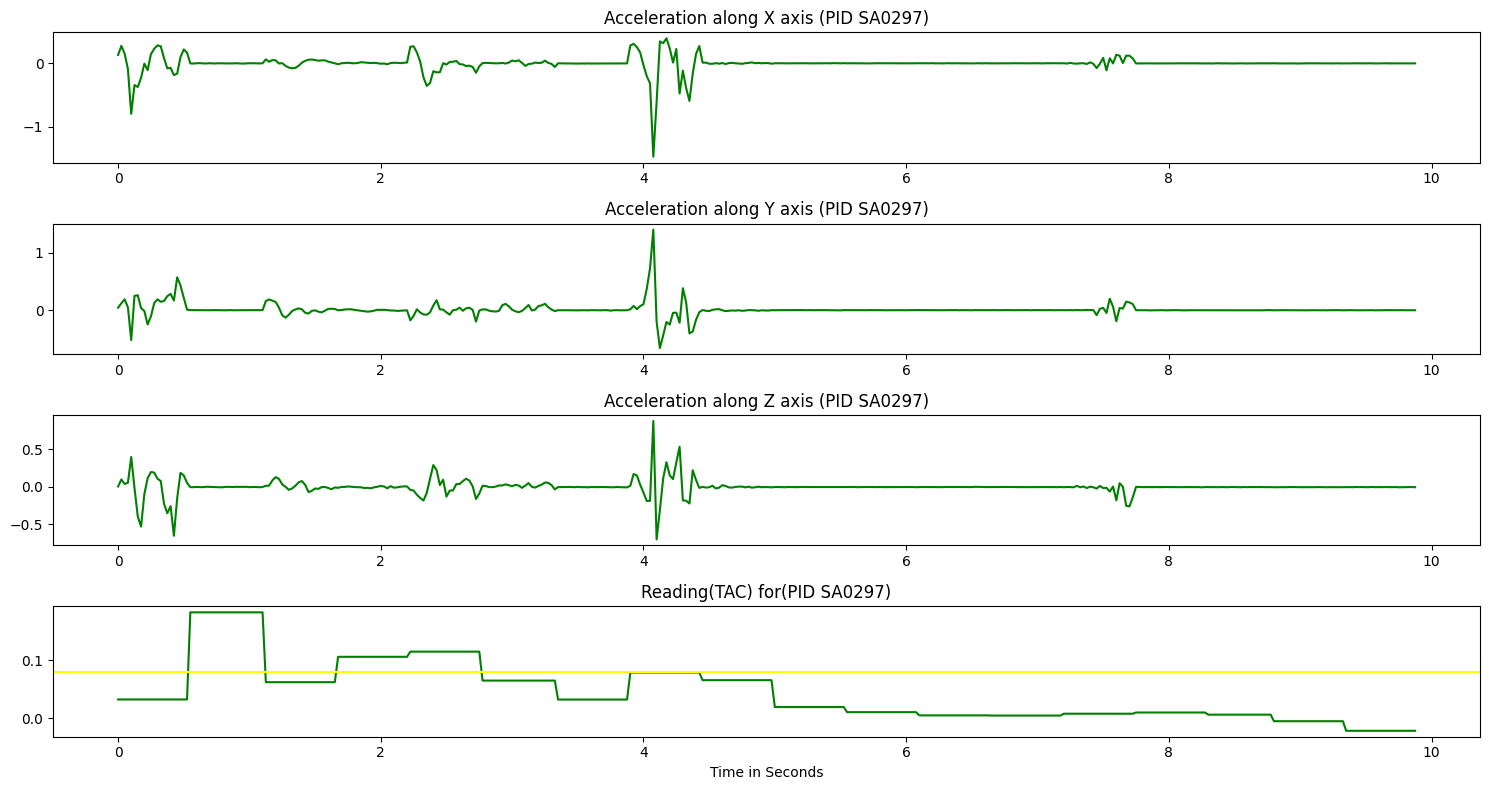

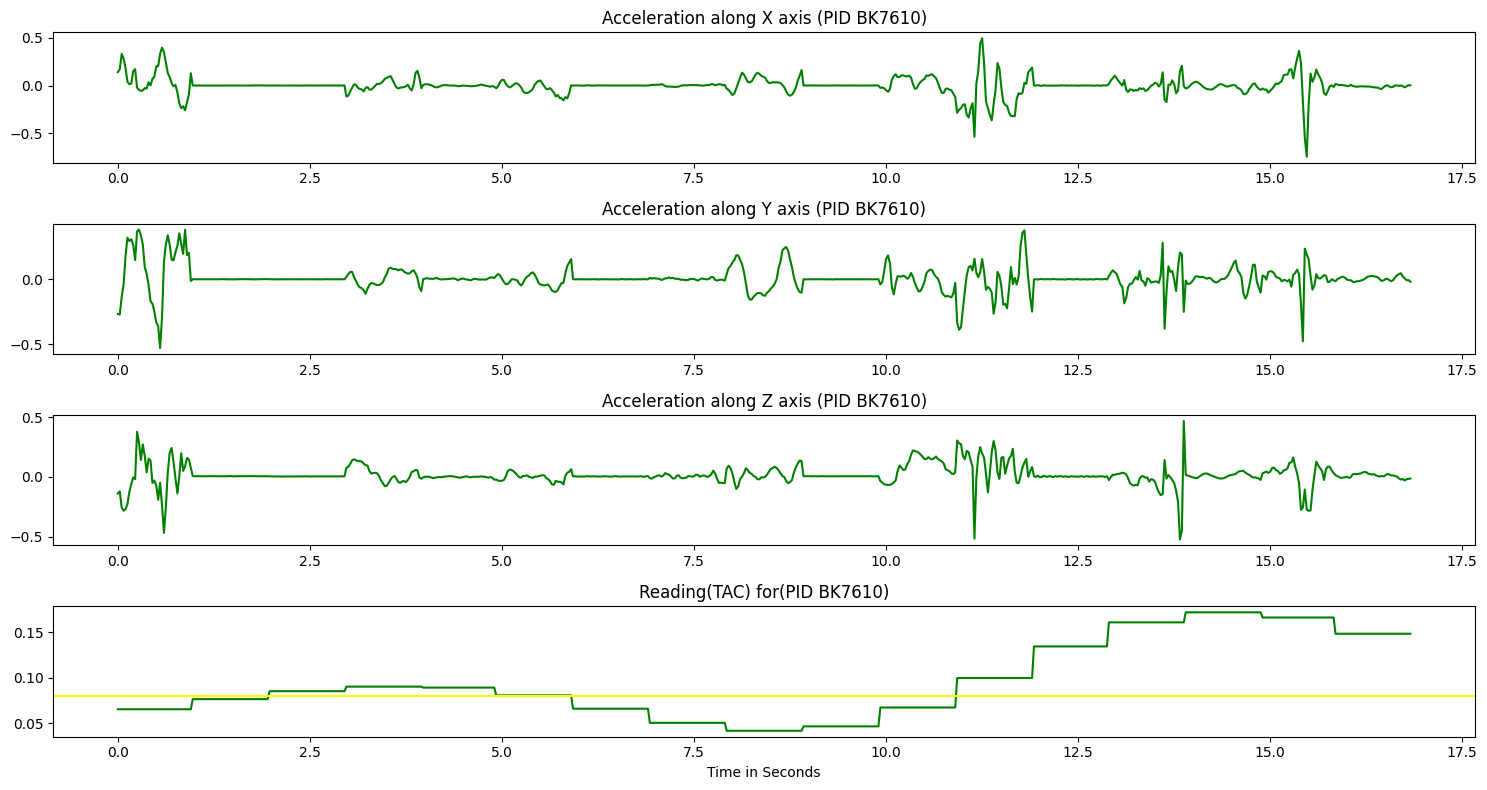

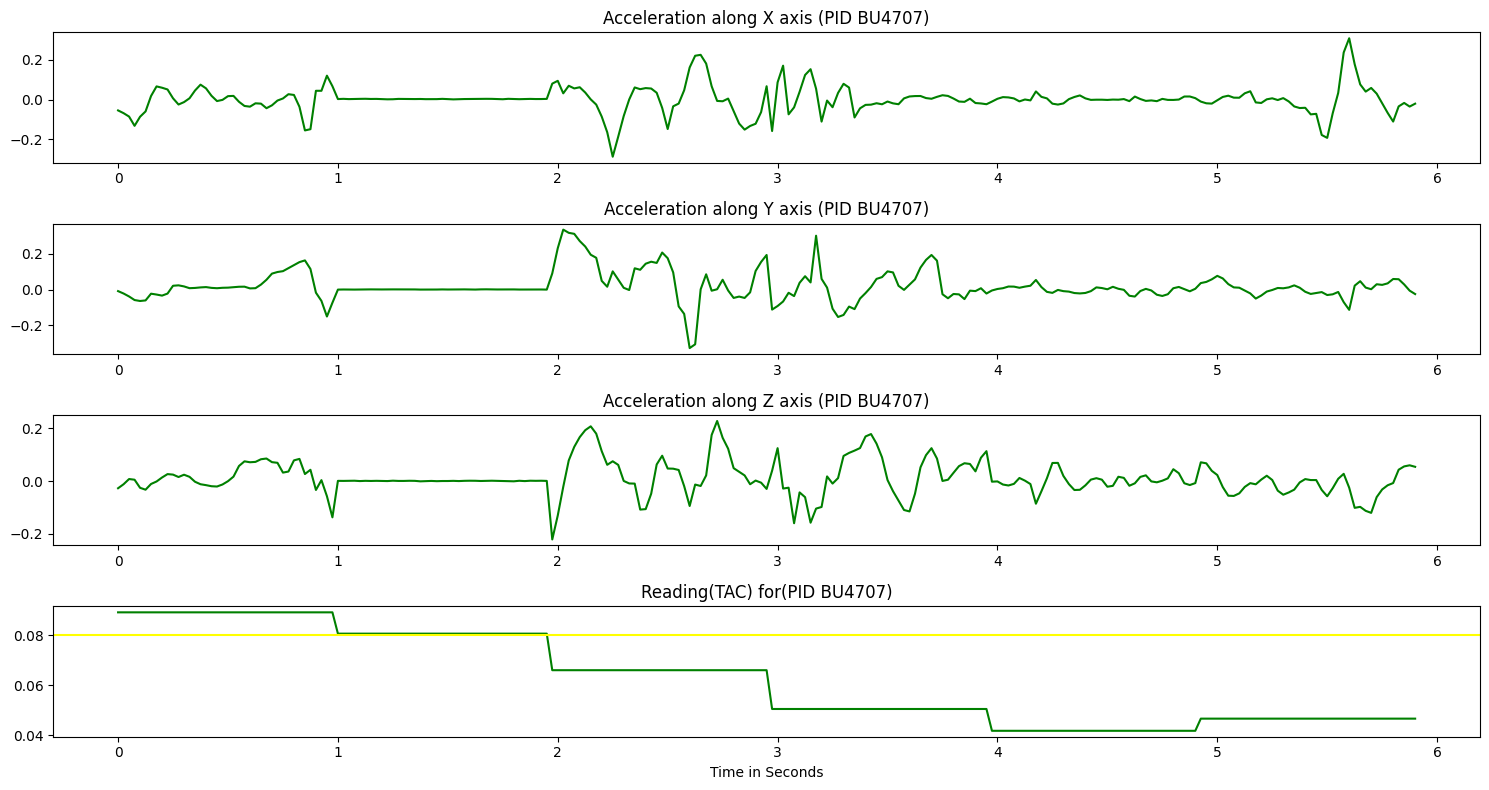

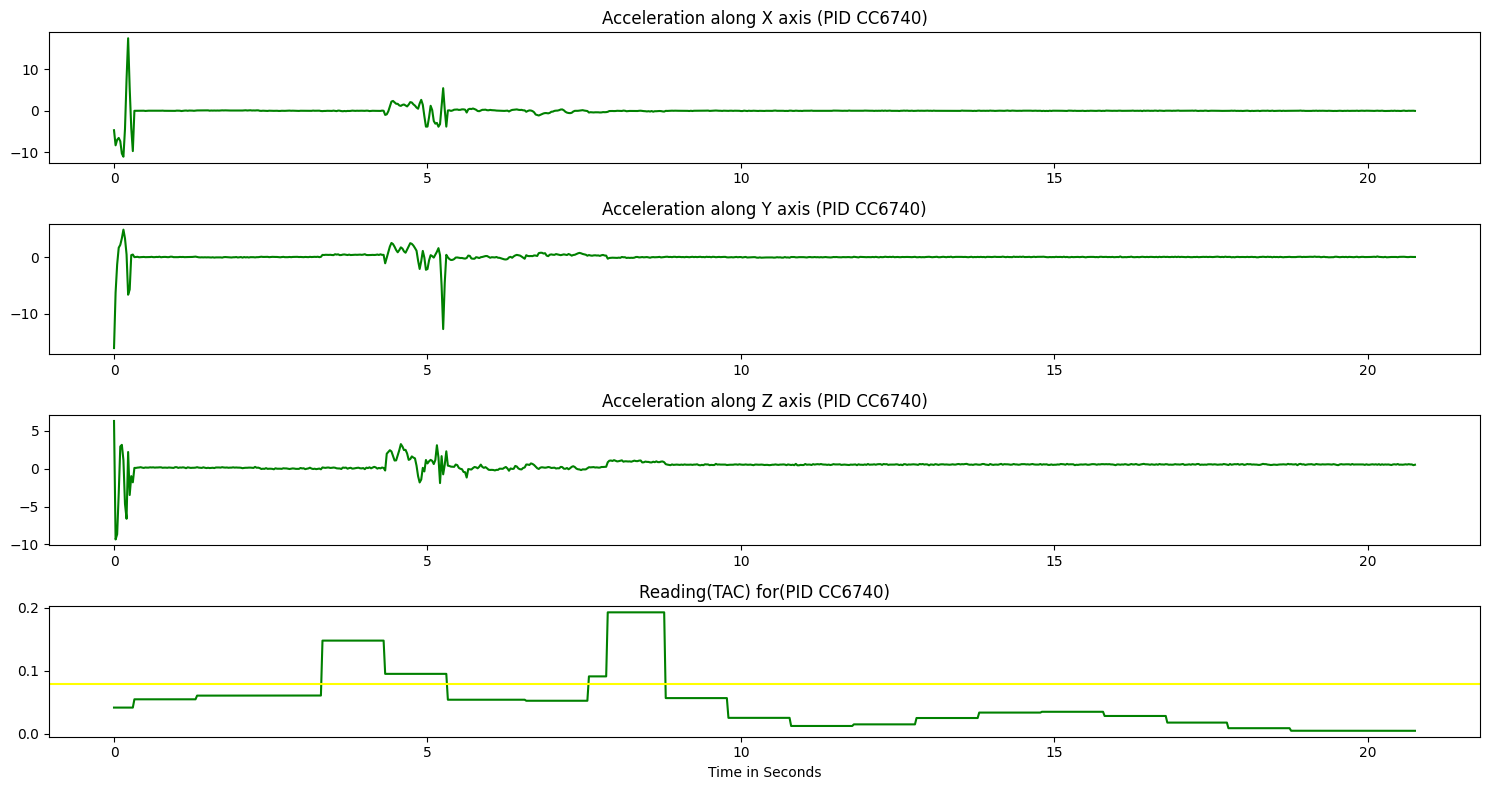

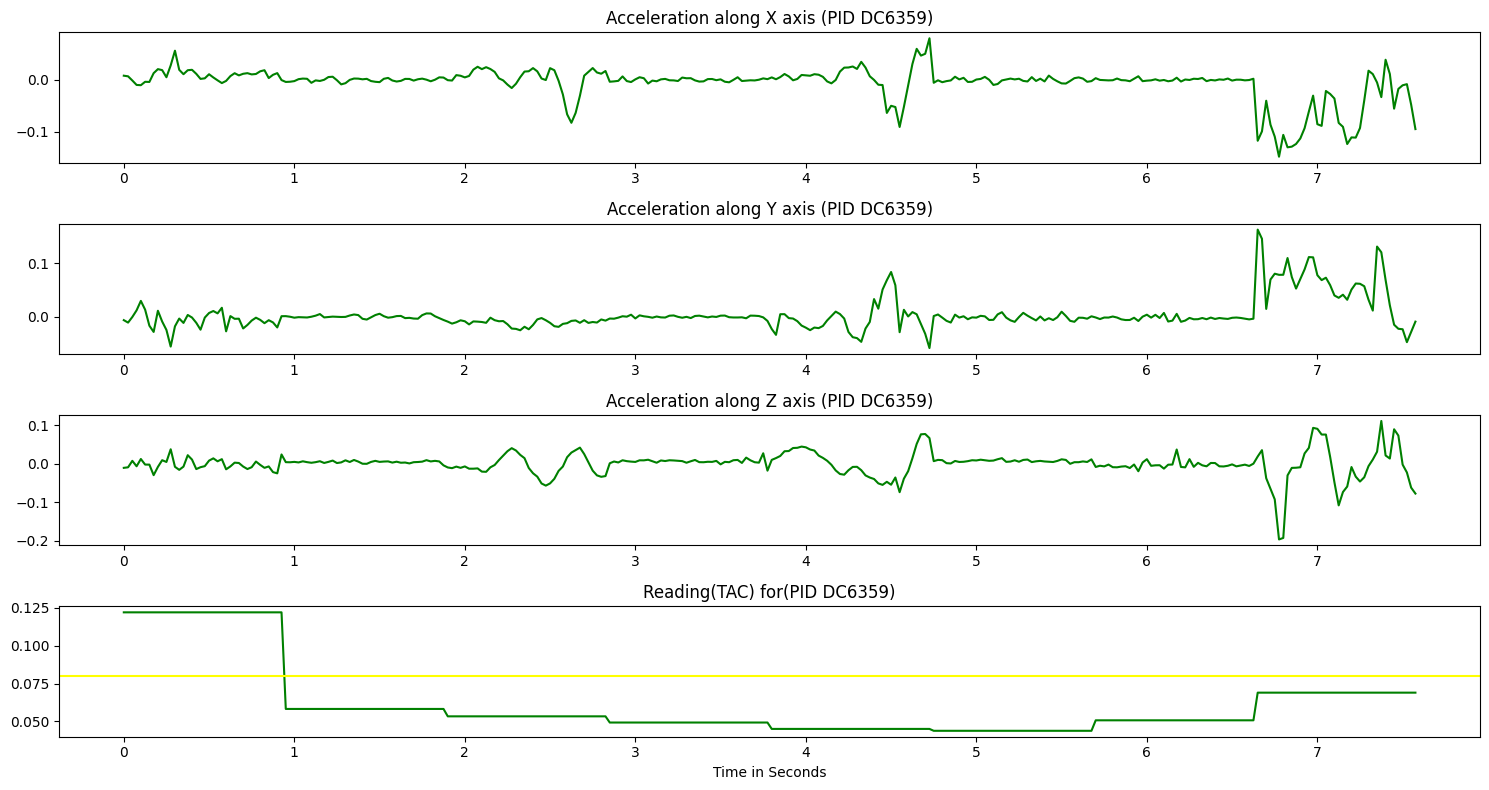

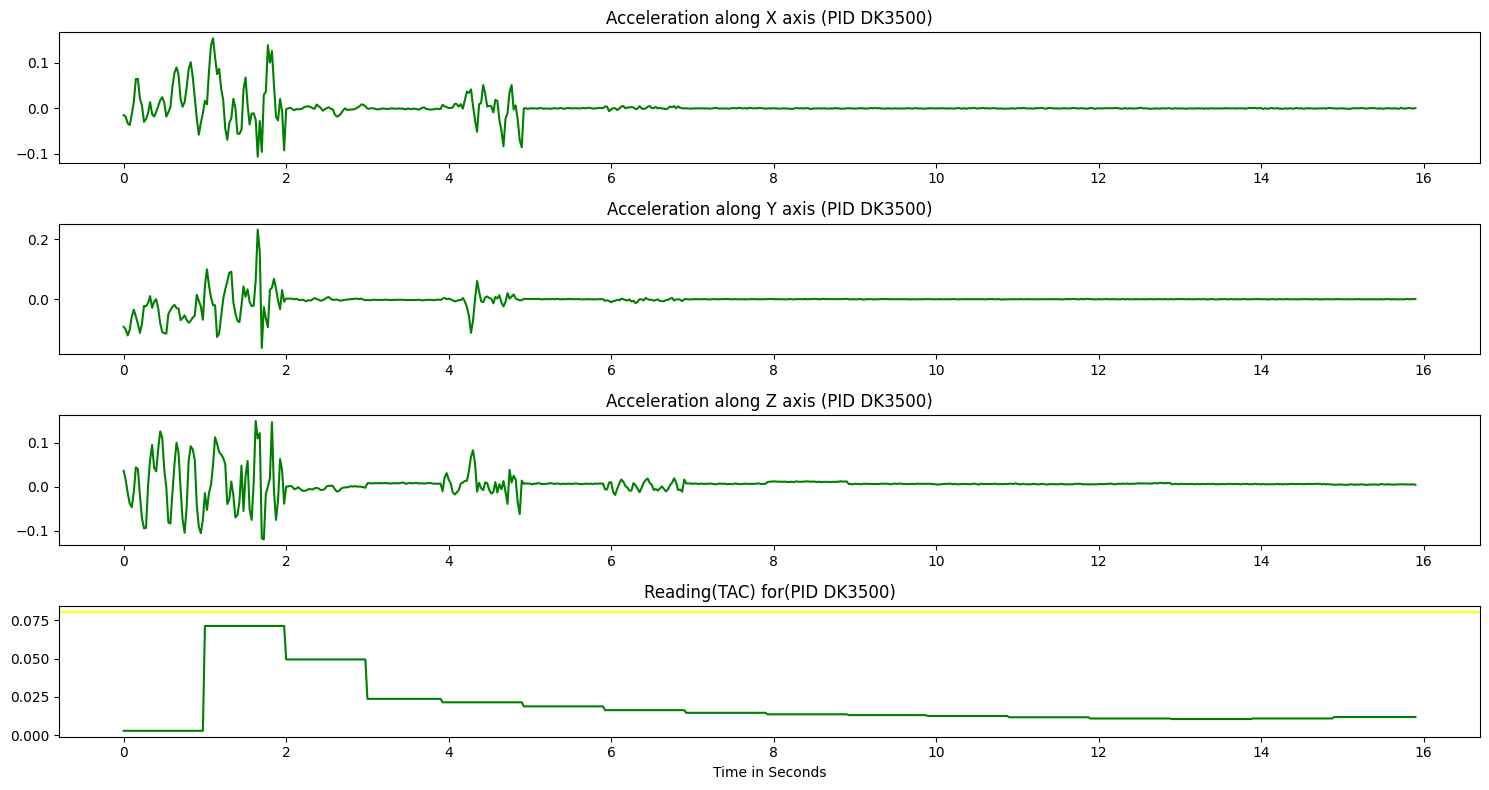

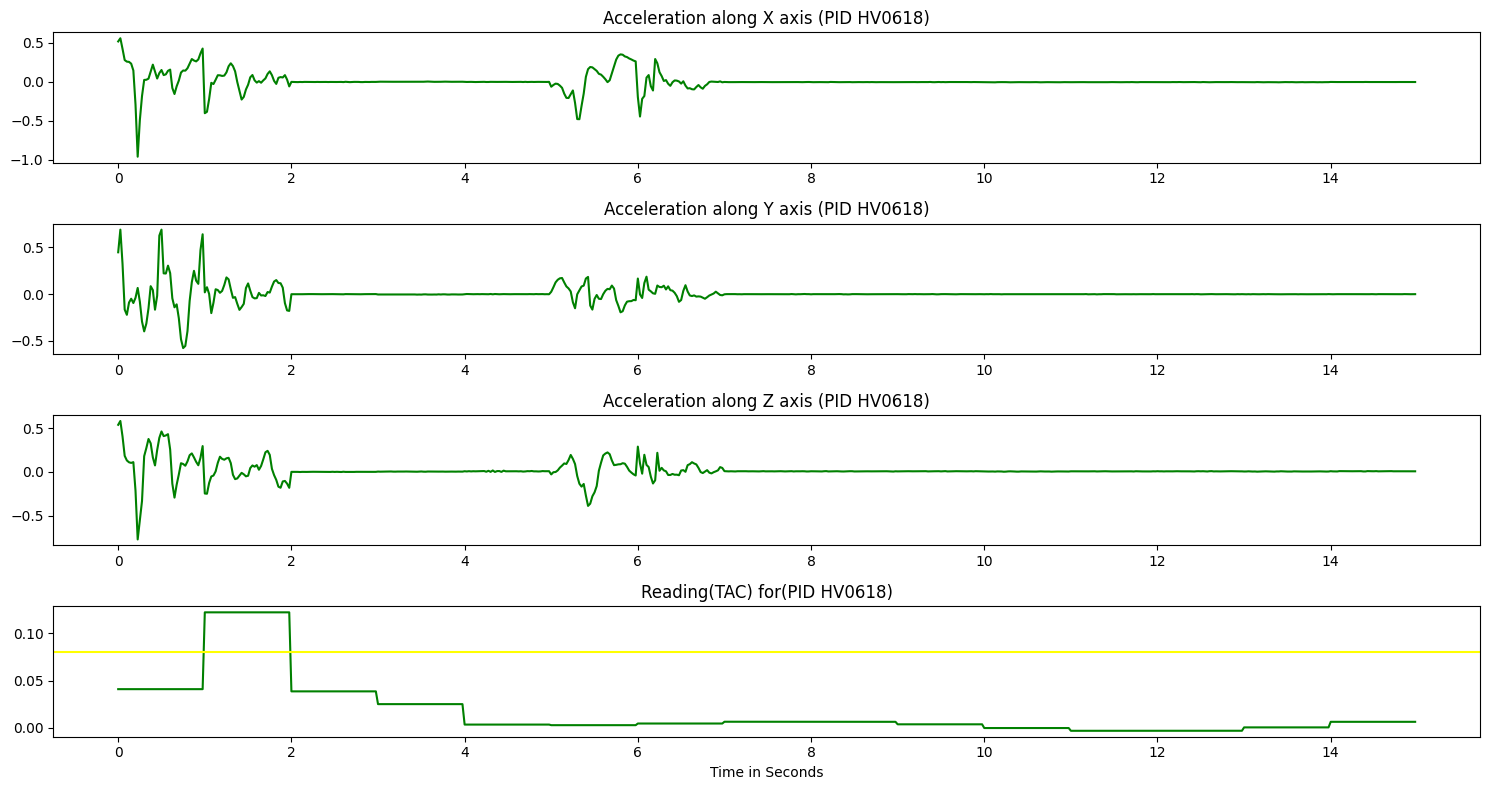

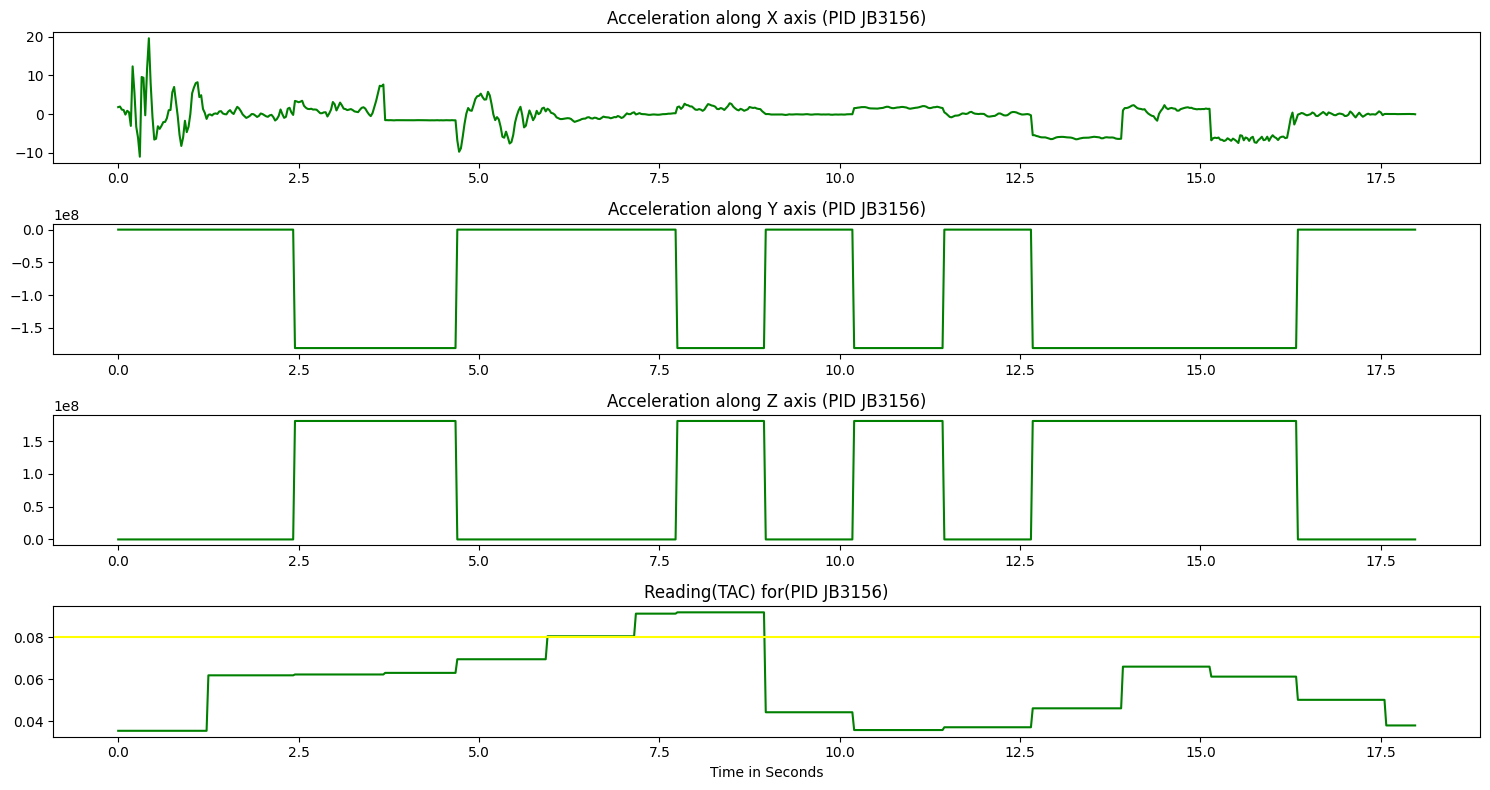

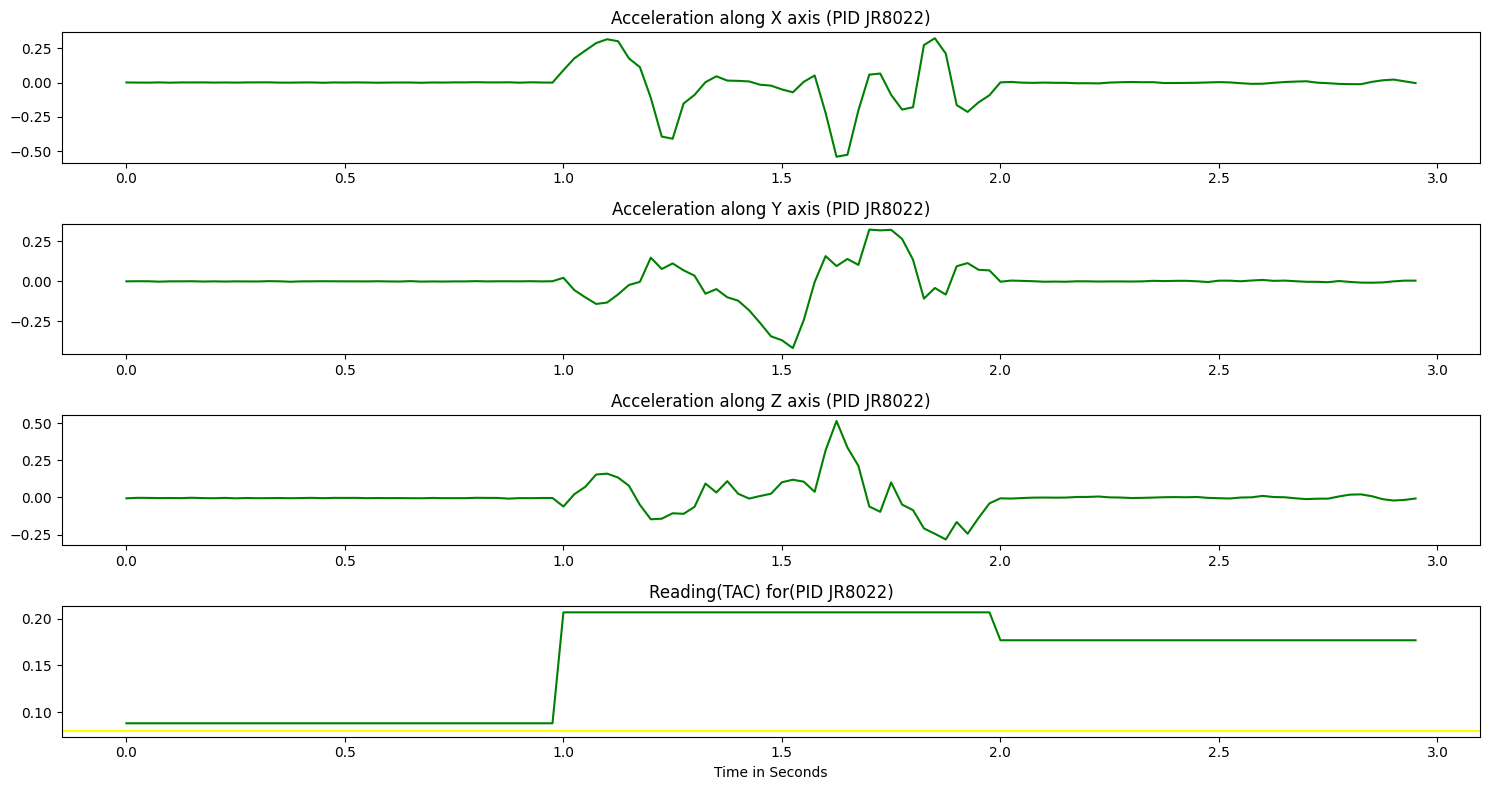

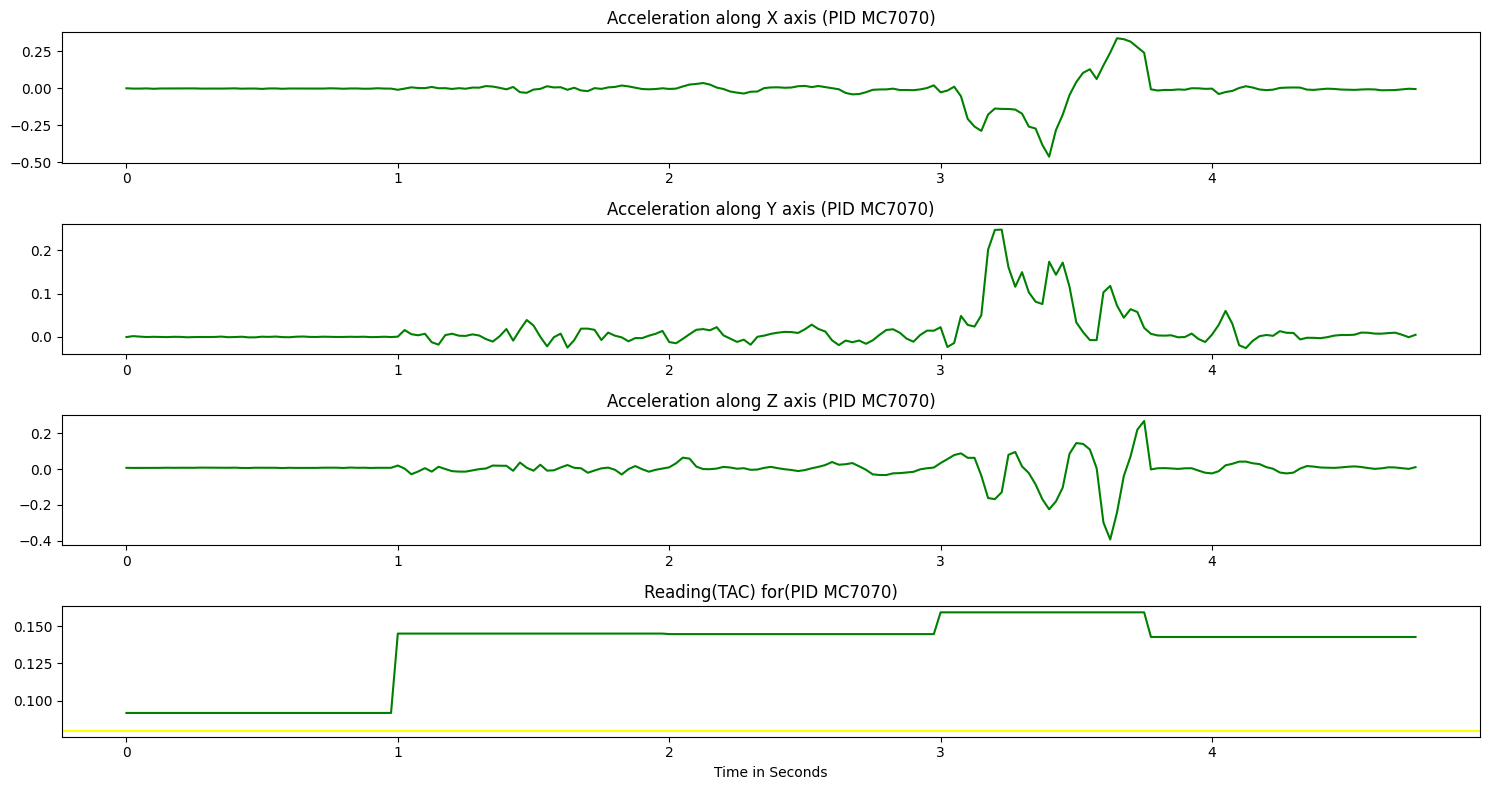

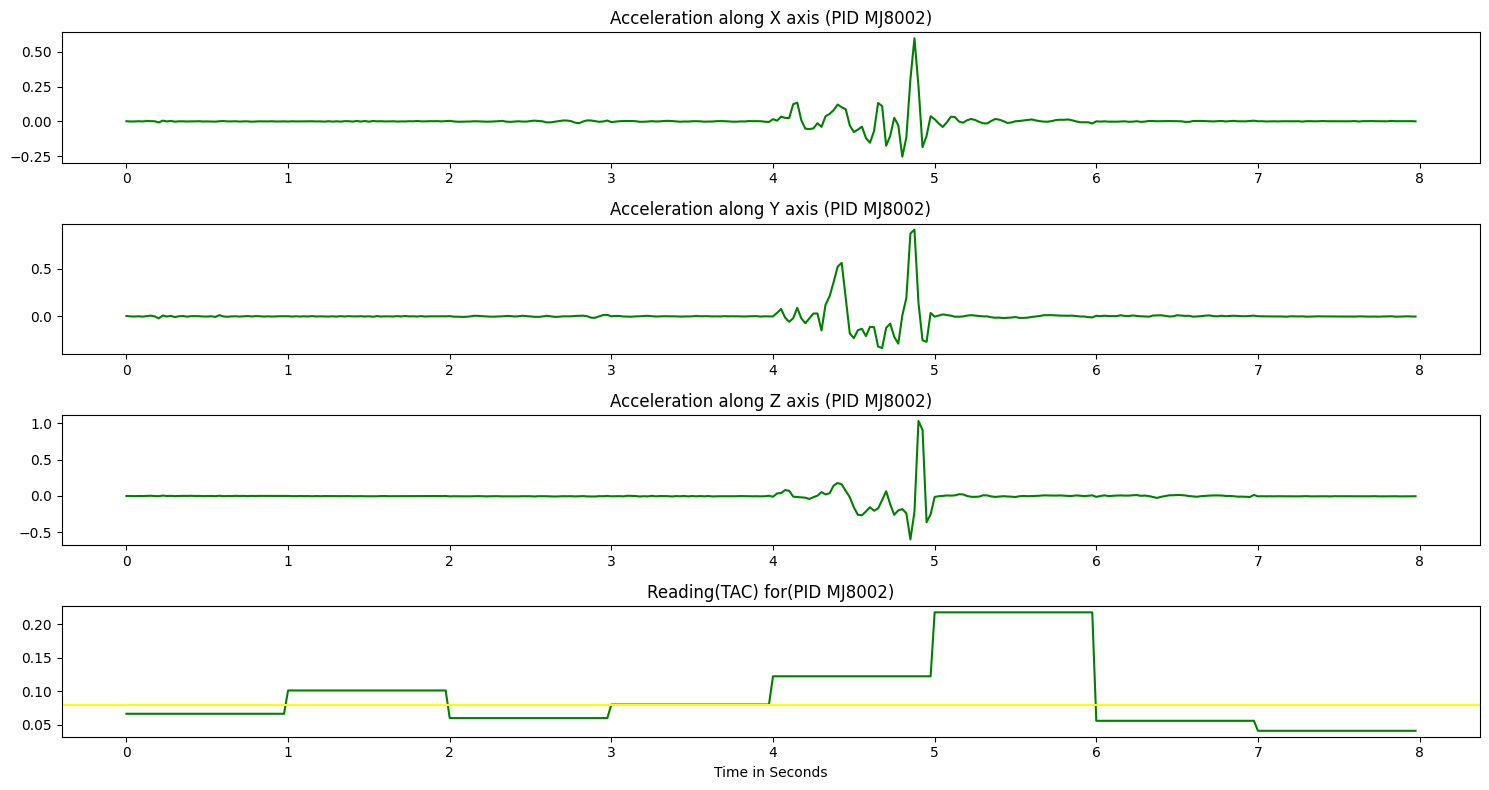

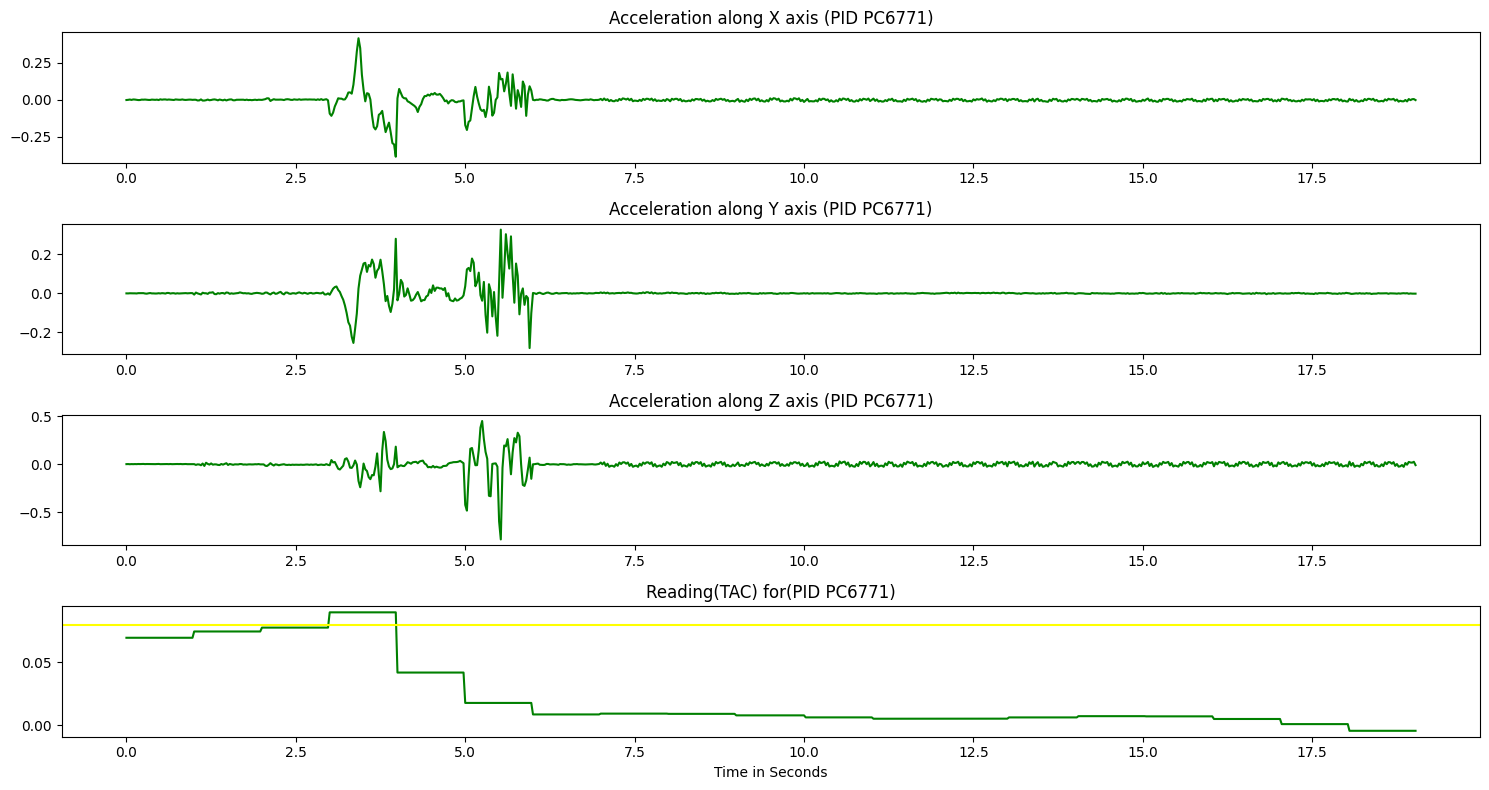

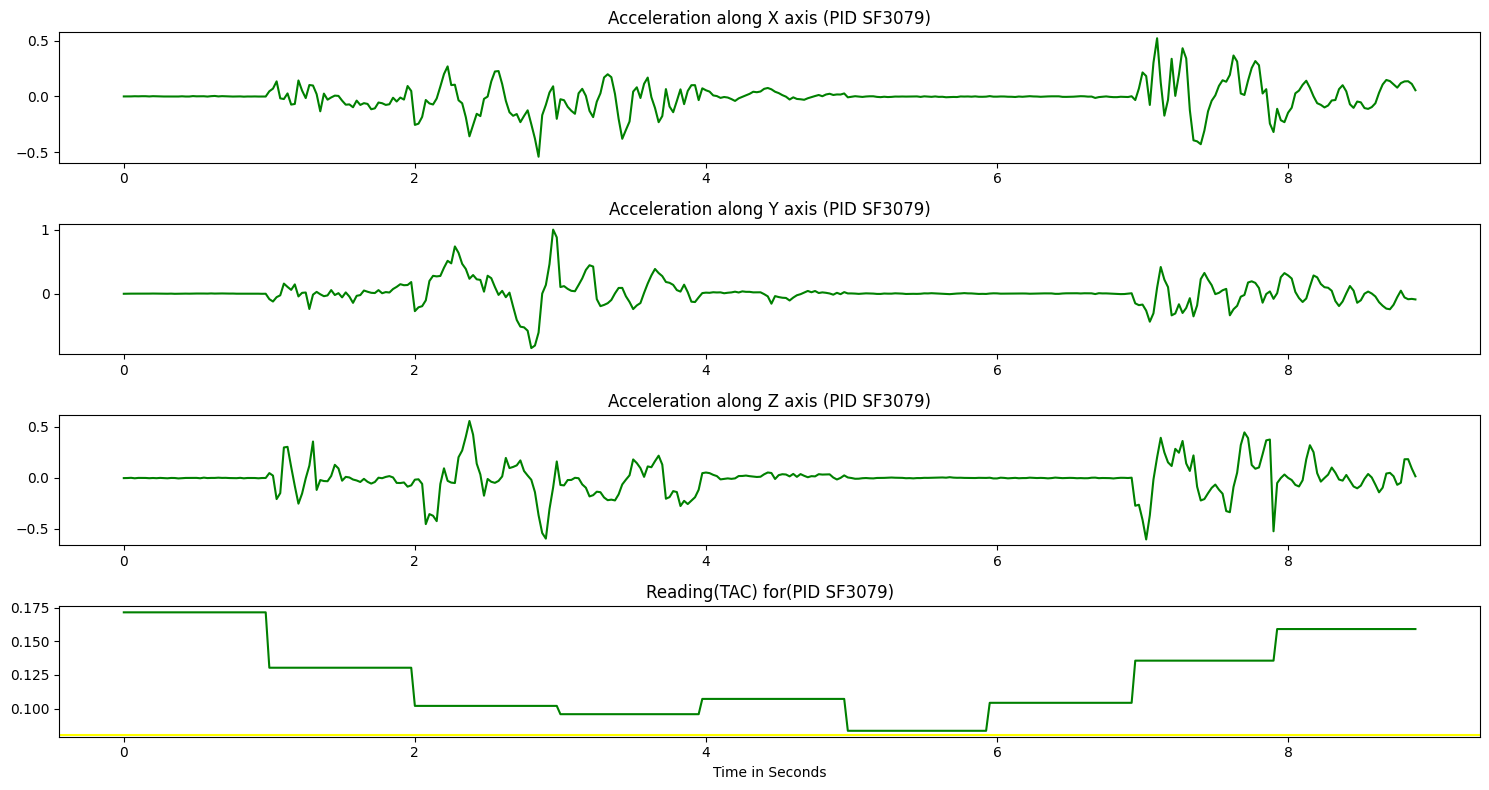

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for pid in all_merged_data:
    PIDs_merged = all_merged_data[pid]
    timestm = np.arange(PIDs_merged['x'].size) / 40
    fig, ax = plt.subplots(4, figsize=(15, 8))
    plt.xlabel("Time in Seconds") # setting x axis time in seconds

    # This is for x axis
    ax[0].plot(timestm, "x", data=PIDs_merged, color='green')

    # This is for y axis
    ax[1].plot(timestm, "y", data=PIDs_merged, color='green')

    # This is for Z axis
    ax[2].plot(timestm, "z", data=PIDs_merged, color='green')

    # This is for TAC reading
    ax[3].plot(timestm, "TAC_Reading", data=PIDs_merged, color='green')
    ax[3].axhline(y=0.08, color='yellow', linestyle='-')

    # Title for Subplots
    ax[0].set_title(f"Acceleration along X axis (PID {pid})")
    ax[1].set_title(f"Acceleration along Y axis (PID {pid})")
    ax[2].set_title(f"Acceleration along Z axis (PID {pid})")
    ax[3].set_title(f"Reading(TAC) for(PID {pid})")


    plt.tight_layout()
    plt.show()


# Permutation Entropy and Complexity method

Shannon_Entropy is a measure to calculate Uncertinity or unpredictability of the data

H(X)=∑i=1np(xi)log2(p(xi))

Where:

•	H(X) is the Shannon entropy of the random variable X.

•	p(xi) is the probability of outcome xi.

•	log2 denotes the base-2 logarithm.




<ipython-input-125-ef25d3d59fc2>:36: RuntimeWarning: invalid value encountered in scalar divide
  return Shannon_entropy(p) / max_entropy
<ipython-input-125-ef25d3d59fc2>:45: RuntimeWarning: divide by zero encountered in scalar divide
  Q_o = -1 / (constant1 + constant2 + constant3)
<ipython-input-125-ef25d3d59fc2>:50: RuntimeWarning: invalid value encountered in scalar multiply
  Comp_JS = Q_o * JSdivergence * pe


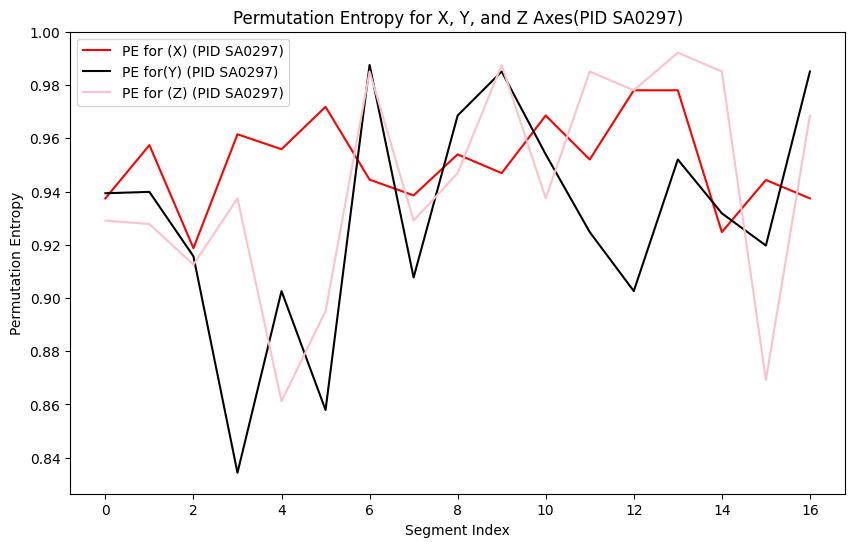

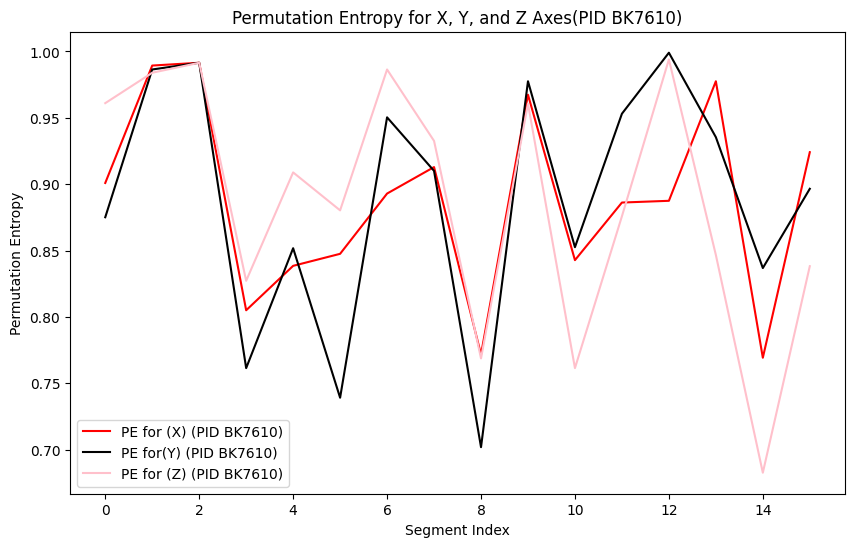

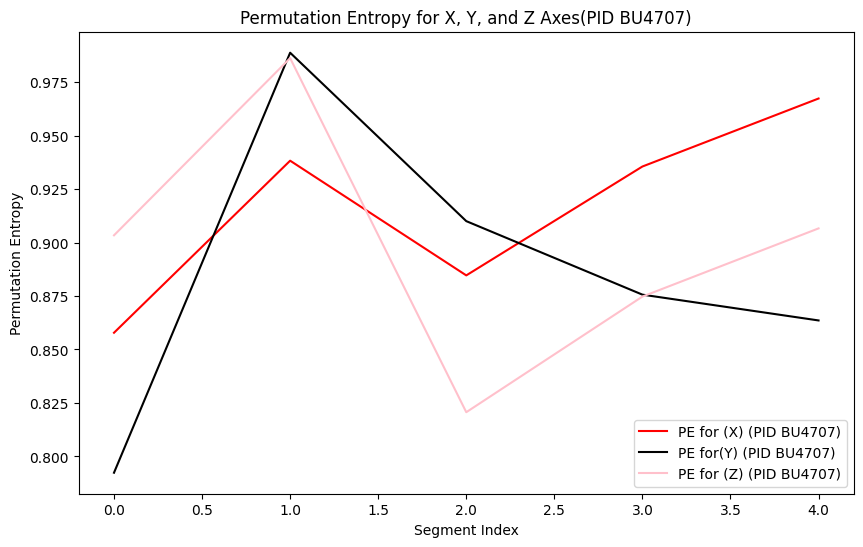

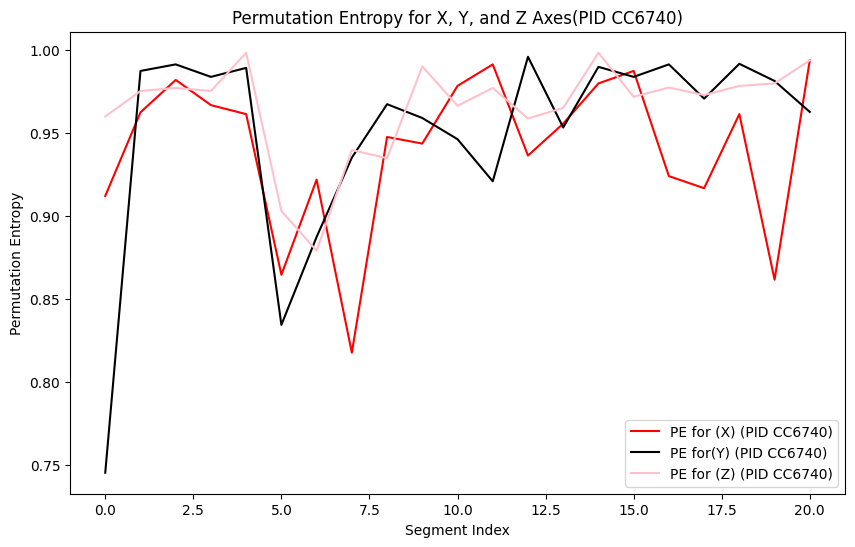

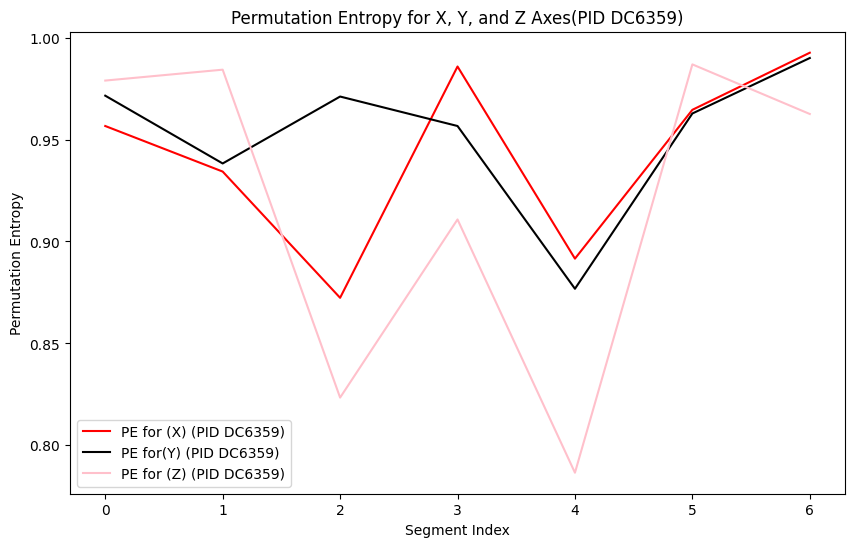

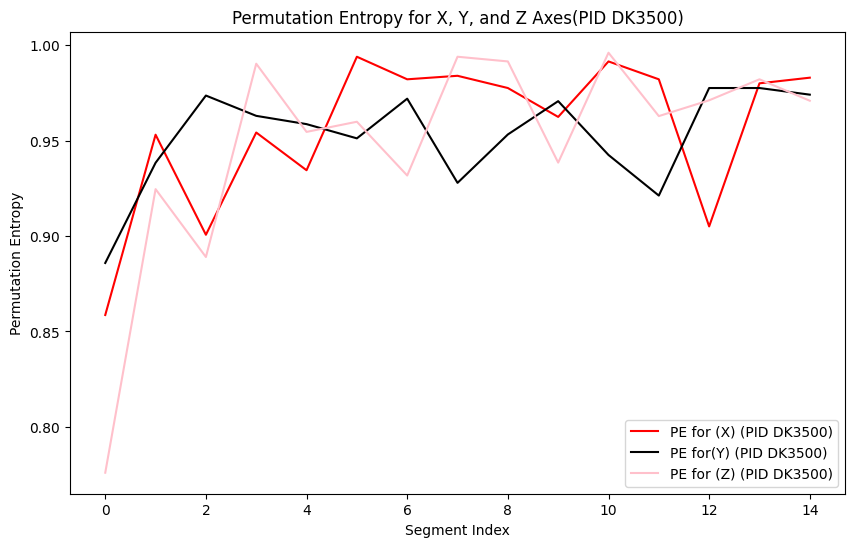

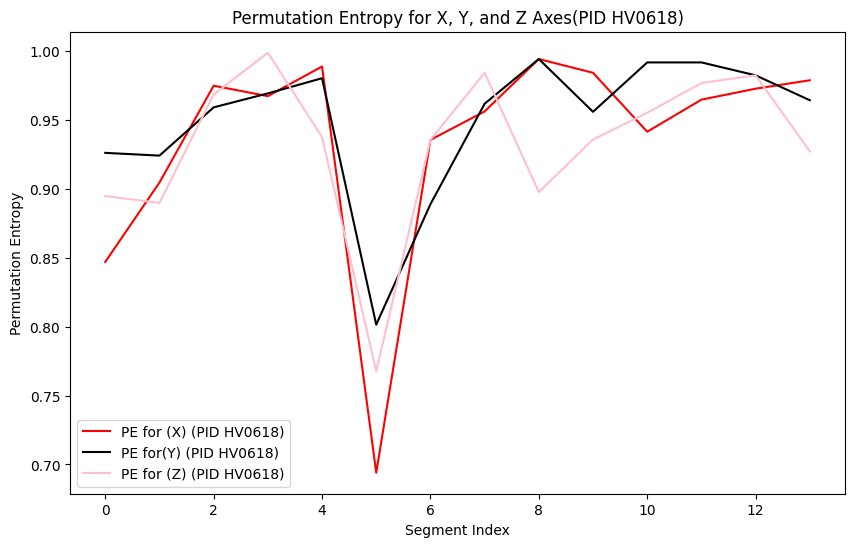

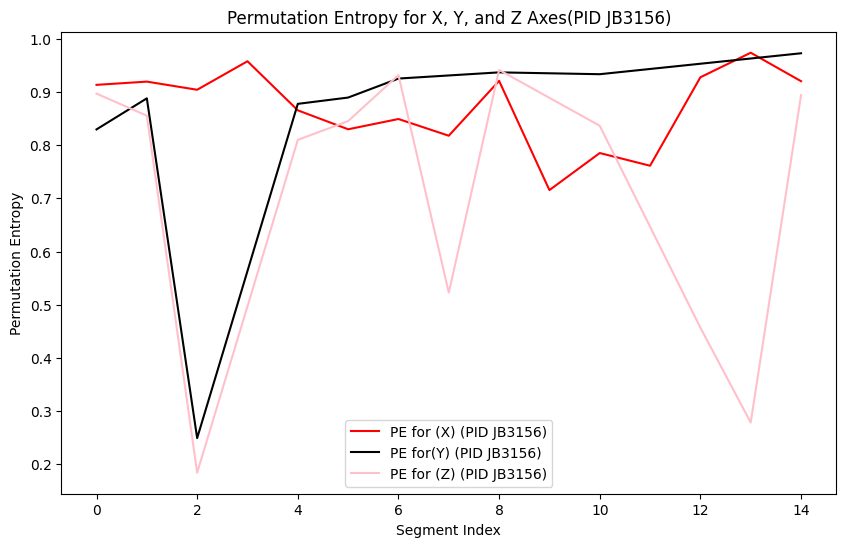

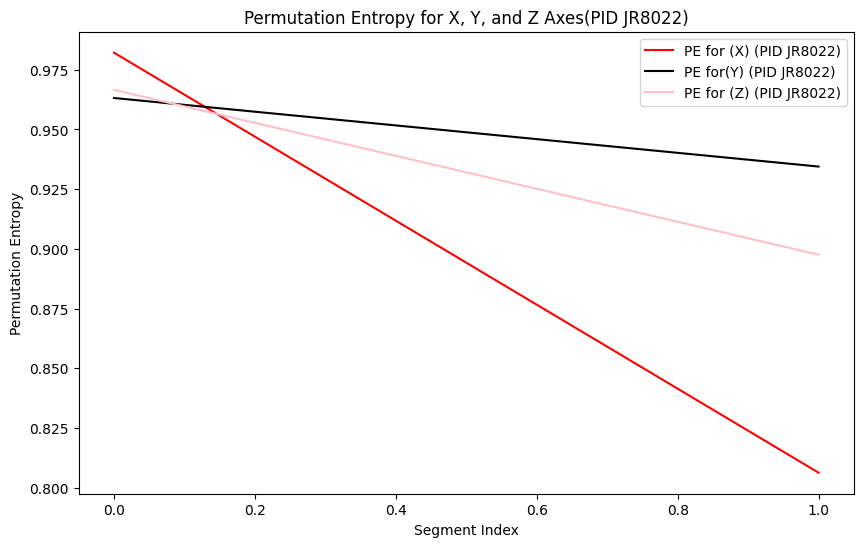

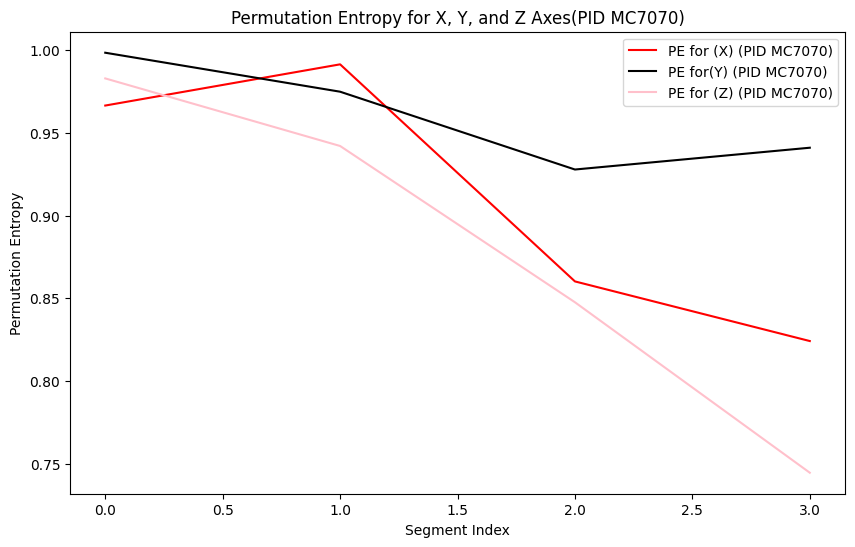

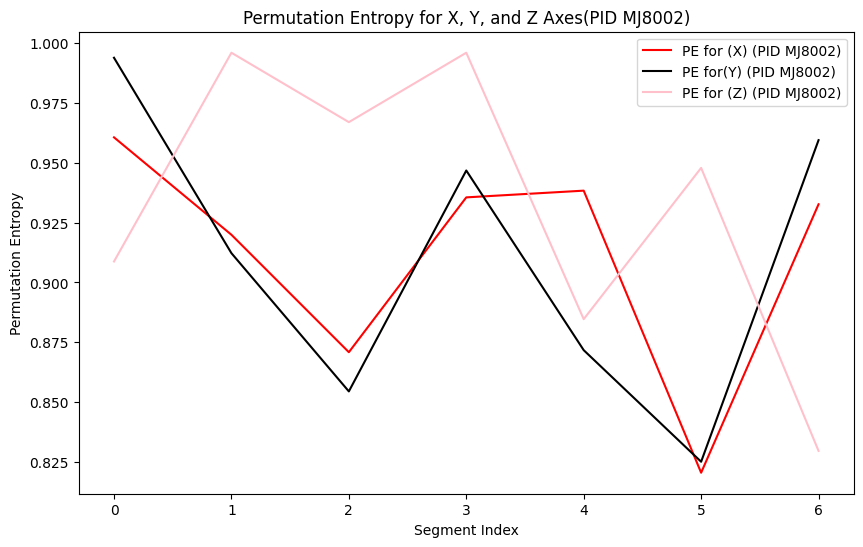

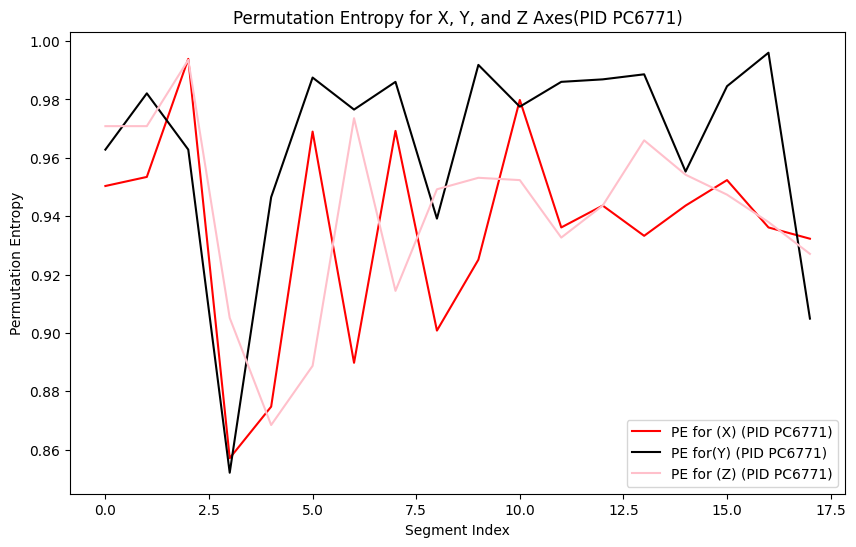

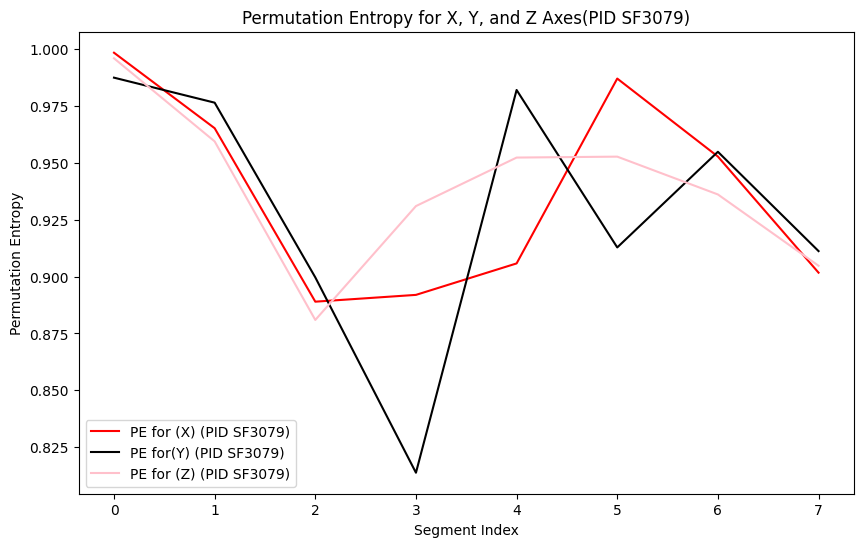

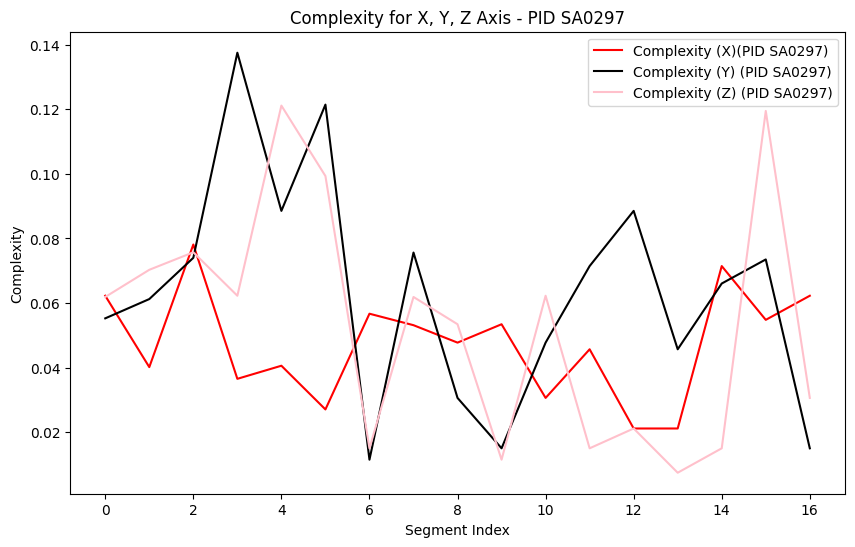

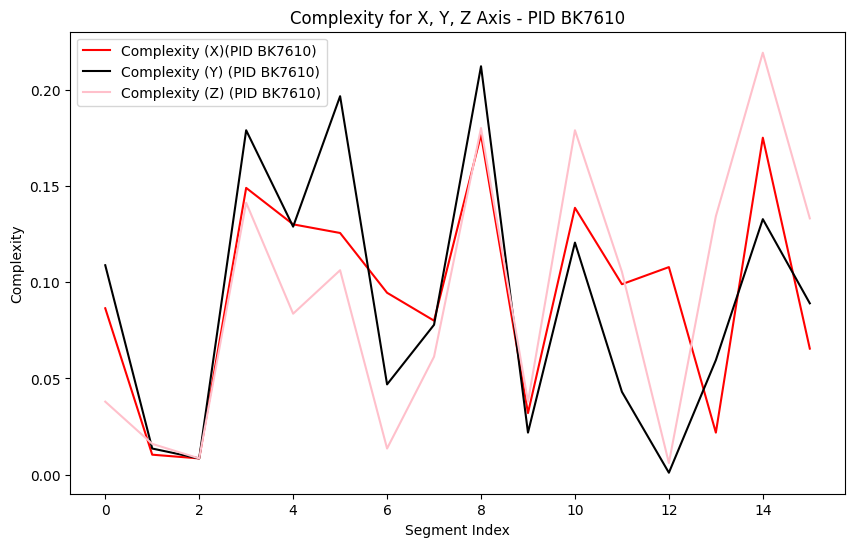

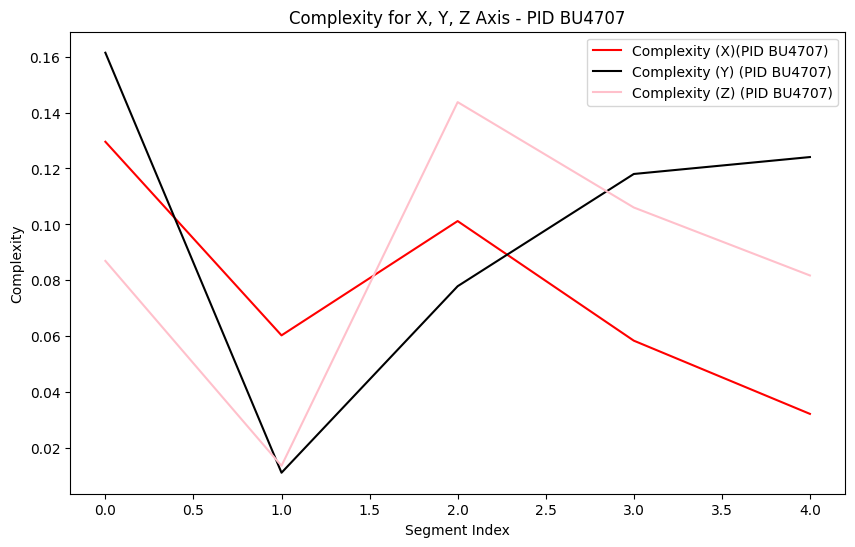

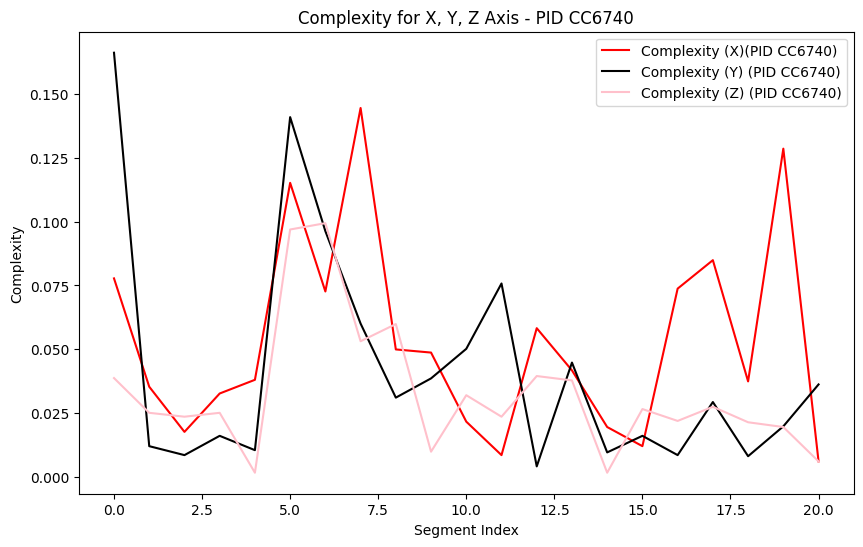

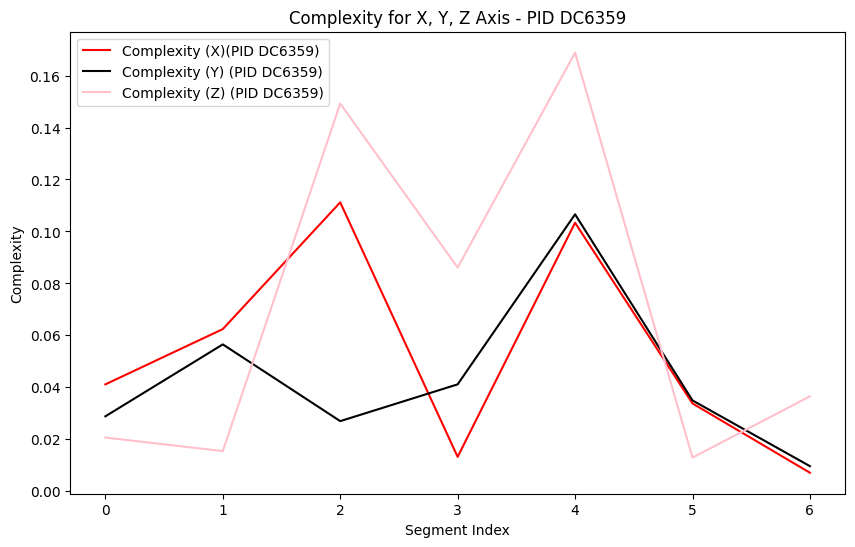

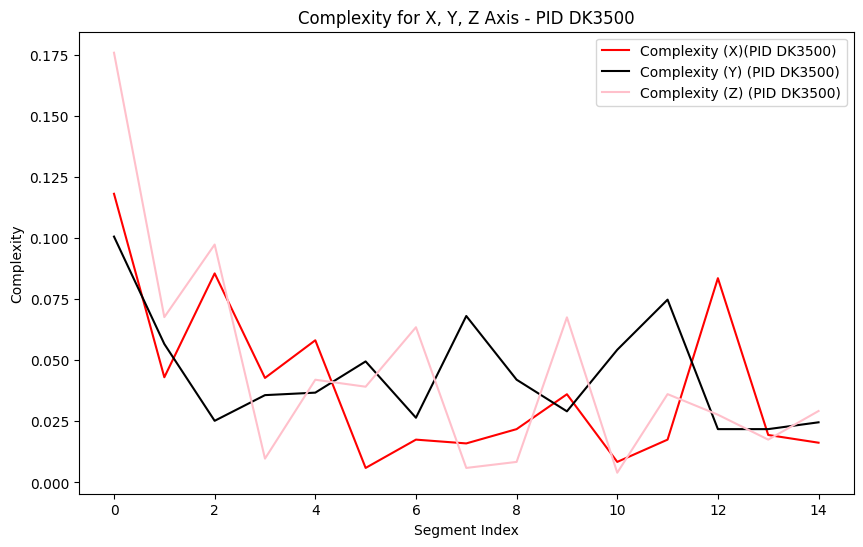

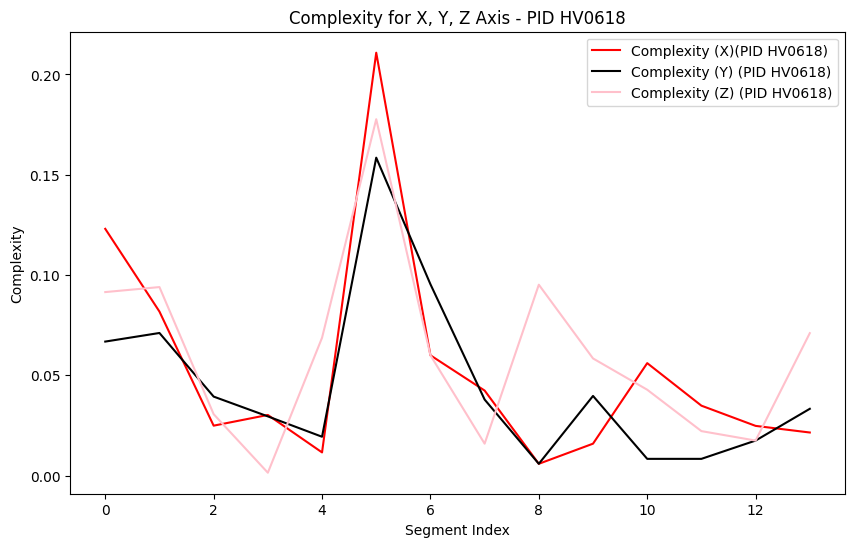

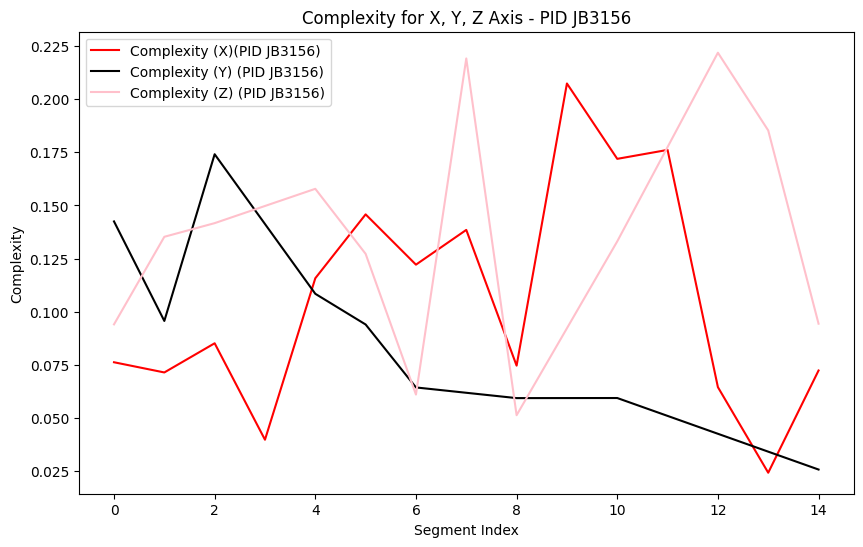

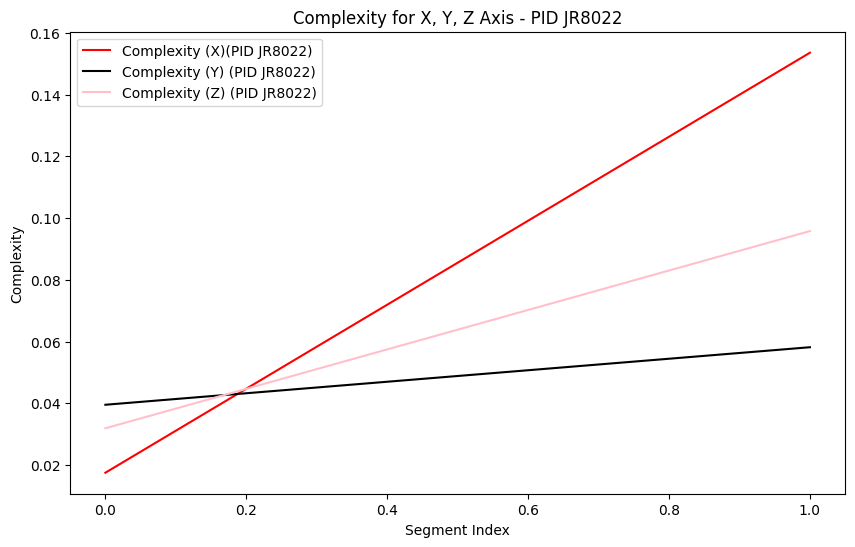

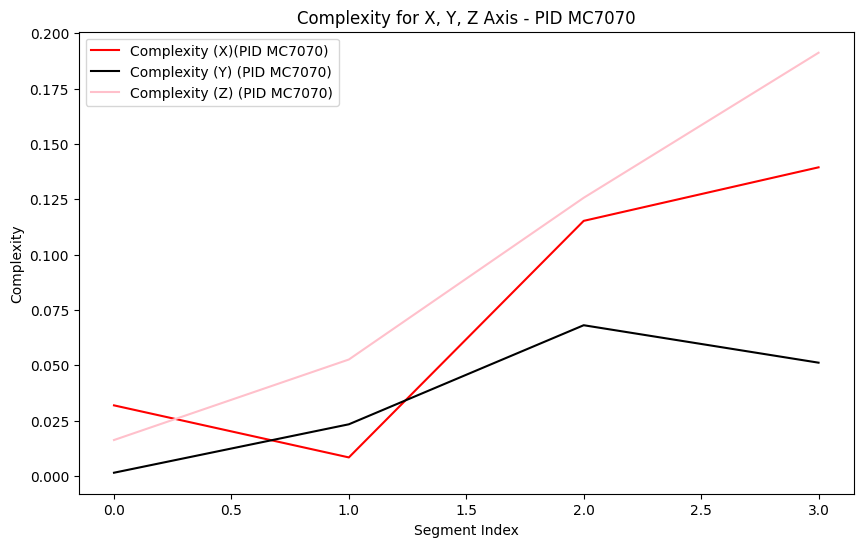

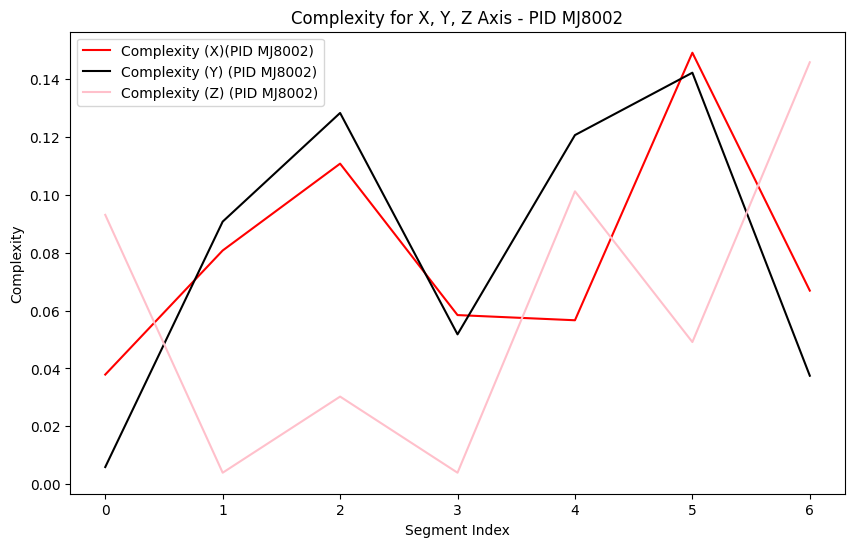

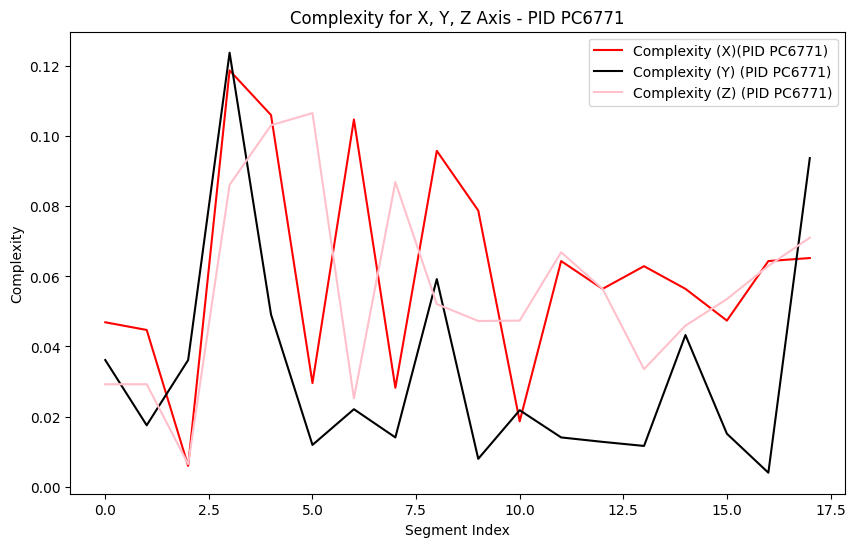

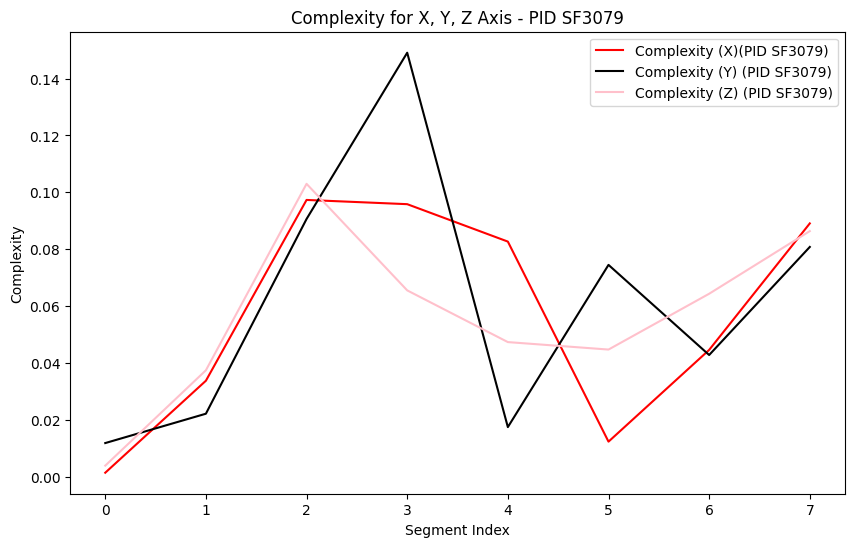

In [ ]:
# This fuction will calculate shannon entropy
def Shannon_entropy(frequency):
    frequency = [element for element in frequency if element != 0]
    entropy_score = 0.0
    for freq in frequency:
        entropy_score += freq * np.log(freq)
    entropy_score = -entropy_score
    return entropy_score

# This function will calculate relative order
def relative_order(time_series, emd_dimention, embdelay):
    m, t = emd_dimention, embdelay
    x = np.array(time_series)
    temp = np.zeros((x.shape[0], m))
    for i in range(m):
        temp[:, i] = np.roll(x, i*t)
    dividing = temp[(t*(m-1)):, :]
    permutation = np.argsort(dividing)
    idx = _hash(permutation)
    countime_series = np.zeros(math.factorial(m))
    for i in range(countime_series.shape[0]):
        countime_series[i] = (idx == i).sum()
    return list(countime_series[countime_series != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])

# This function will compute permutation Entropy
def permutation_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return Shannon_entropy(p) / max_entropy


#This is to calculate complexity
def complexity(op):
    pe = permutation_entropy(op)
    constant1 = (0.5 + ((1 - 0.5) / len(op))) * np.log(0.5 + ((1 - 0.5) / len(op)))
    constant2 = ((1 - 0.5) / len(op)) * np.log((1 - 0.5) / len(op)) * (len(op) - 1)
    constant3 = 0.5 * np.log(len(op))
    Q_o = -1 / (constant1 + constant2 + constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5 * temp_op_prob) + (0.5 * (1 / len(op)))
    JSdivergence = (Shannon_entropy(temp_op_prob2) - 0.5 * Shannon_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return Comp_JS


def computing_complexity_Entropy(df_segment, axis):
    op = relative_order(df_segment[axis], 3, 1)
    pe = permutation_entropy(op)
    comp = complexity(op)
    return pe, comp

#This function will return Start and End indices
Dict_for_segment = {}
for pid, PIDs_merged in all_merged_data.items():
    Start_indices = [0]
    for i in range(1, len(PIDs_merged)):
        if PIDs_merged['TAC_Reading'].iloc[i] != PIDs_merged['TAC_Reading'].iloc[i-1]:
            Start_indices.append(i)
    Dict_for_segment[pid] = Start_indices


pe_resultime_series_dict = {}
comp_resultime_series_dict = {}
for pid, PIDs_merged in all_merged_data.items():
    Start_indices = Dict_for_segment[pid]
    pe_resultime_series_pid = {'x': [], 'y': [], 'z': []}
    comp_resultime_series_pid = {'x': [], 'y': [], 'z': []}
    for i in range(1, len(Start_indices)):
        segment_start_index = Start_indices[i-1]
        segment_end_index = Start_indices[i]
        df_segment = PIDs_merged.iloc[segment_start_index:segment_end_index]


        pe_x, comp_x = computing_complexity_Entropy(df_segment, 'x')
        pe_y, comp_y = computing_complexity_Entropy(df_segment, 'y')
        pe_z, comp_z = computing_complexity_Entropy(df_segment, 'z')


        pe_resultime_series_pid['x'].append(pe_x)
        pe_resultime_series_pid['y'].append(pe_y)
        pe_resultime_series_pid['z'].append(pe_z)
        comp_resultime_series_pid['x'].append(comp_x)
        comp_resultime_series_pid['y'].append(comp_y)
        comp_resultime_series_pid['z'].append(comp_z)

    pe_resultime_series_dict[pid] = pe_resultime_series_pid
    comp_resultime_series_dict[pid] = comp_resultime_series_pid


for pid, pe_resultime_series_pid in pe_resultime_series_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pe_resultime_series_pid['x'], label=f'PE for (X) (PID {pid})',color='red')
    sns.lineplot(data=pe_resultime_series_pid['y'], label=f'PE for(Y) (PID {pid})',color='black')
    sns.lineplot(data=pe_resultime_series_pid['z'], label=f'PE for (Z) (PID {pid})',color='pink')
    plt.xlabel('Segment Index')
    plt.ylabel('Permutation Entropy')
    plt.title(f'Permutation Entropy for X, Y, and Z Axes(PID {pid})')
    plt.legend()
    plt.show()


for pid, comp_resultime_series_pid in comp_resultime_series_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=comp_resultime_series_pid['x'], label=f'Complexity (X)(PID {pid})',color='red')
    sns.lineplot(data=comp_resultime_series_pid['y'], label=f'Complexity (Y) (PID {pid})',color='black')
    sns.lineplot(data=comp_resultime_series_pid['z'], label=f'Complexity (Z) (PID {pid})',color='pink')
    plt.xlabel('Segment Index')
    plt.ylabel('Complexity')
    plt.title(f'Complexity for X, Y, Z Axis - PID {pid}')
    plt.legend()
    plt.show()



# Insights from the Plots

It is evident that the data is extremely irregular and challenging to interpret.

The complexity and permutation entropy graphs indicate that the accelerometer data is too complex to distinguish between heavy and moderate drinking, as indicated by the values that are near to 1.